In [1]:
import pickle 
import numpy as np
import torch 
import pandas as pd
import rootutils
import json
import os 
import yaml
rootutils.setup_root('/idiap/temp/pvuillecard/projects/gaze_pretrain/notebooks', indicator=".project-root", pythonpath=True)
# plot the results 
pd.set_option('display.max_columns', None)
from gaze_module.utils.metrics import compute_gaze_results

### Swin experiment

In [6]:
# resnet experiment
path_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs'
paths_resnet = {
    'baseline' : 'experiments/generalize/run_2024-06-27_15-01-14/logs/train/runs/run_0',
    'gazefollow' : 'experiments/generalize/run_2024-06-27_15-02-32/logs/train/runs/run_0',
    'gazefollow_mps' : 'experiments/generalize/run_2024-06-27_15-02-52/logs/train/runs/run_0',
}

paths_swin = {
    'baseline' : 'experiments/generalize/run_2024-06-27_15-01-30/logs/train/runs/run_0',
    'gazefollow' : 'experiments/generalize/run_2024-06-27_15-03-32/logs/train/runs/run_0',
    'gazefollow_mps' : 'experiments/generalize/run_2024-06-27_15-03-44/logs/train/runs/run_0',
}

In [ ]:

results= []
for k,path in paths_resnet.items():
    path_exp = os.path.join(path_log, path)
    files = os.listdir(os.path.join(path_exp,'metric','test'))
    files = [f for f in files if f.endswith('.pkl')][0]
    with open(os.path.join(path_exp,'metric','test',files), 'rb') as f:
        results_pred = pickle.load(f)
    metrics = compute_gaze_results(results_pred, 'cartesian')
    col_name = list(metrics.keys())
    metrics['model'] = 'resnet'
    metrics['experiment'] = k
    results.append(metrics)

results_resnet = pd.DataFrame(results)
# change column order 
results_resnet = results_resnet[['model','experiment']+col_name]
results_resnet.to_csv('results/results_resnet.csv', index=False)

results_resnet

In [15]:
results= []
for k,path in paths_swin.items():
    path_exp = os.path.join(path_log, path)
    files = os.listdir(os.path.join(path_exp,'metric','test'))
    files = [f for f in files if f.endswith('.pkl')][0]
    with open(os.path.join(path_exp,'metric','test',files), 'rb') as f:
        results_pred = pickle.load(f)
    metrics = compute_gaze_results(results_pred, 'cartesian')
    col_name = list(metrics.keys())
    metrics['model'] = 'swin'
    metrics['experiment'] = k
    results.append(metrics)

results_swin = pd.DataFrame(results)
# change column order 
results_swin = results_swin[['model','experiment']+col_name]
results_swin.to_csv('results/results_swin.csv', index=False)
results_swin.to_markdown('results/results_swin.md', index=False)
results_swin

/idiap/temp/pvuillecard/miniconda3/envs/uniface/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: The ``compute`` method of metric AngularError was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


,model,experiment,Gaze360_full,Gaze360_back,Gaze360_180,Gaze360_20,Gaze360_face,GFIE_full,GFIE_180,GFIE_20,...,MPSGaze_30,MPSGaze_60,MPSGaze_90,MPSGaze_120,MPSGaze_150,MPSGaze_180,MPSGaze_210,MPSGaze_240,Eyediap_3D,Eyediap_2D
0,swin,baseline,14.92,21.03,13.22,10.96,12.66,21.41,20.97,NaN,...,28.27,25.19,24.75,22.40,23.74,23.95,20.65,20.54,26.51,15.76
1,swin,gazefollow,14.16,20.22,12.47,10.50,12.10,14.42,13.31,NaN,...,25.99,23.68,23.10,21.60,21.45,23.03,18.03,18.80,23.40,15.40
2,swin,gazefollow_mps,13.90,20.21,12.15,9.80,11.66,14.60,13.62,NaN,...,15.77,9.90,9.30,7.71,7.04,7.30,7.24,5.93,24.01,14.18


# Generalization using omnivore

In [2]:
dir_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
paths = {
    'Gaze360': {
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_12-50-08',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/omnivore/run_2024-07-03_12-50-08/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    },
    'Gaze360V': {
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_14-25-02',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/omnivore/run_2024-07-03_14-25-02/logs/train/runs/run_0/checkpoints/best_epoch_031.ckpt',
    },
    'Gaze360 Gaze360V': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-10-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-10-56/logs/train/runs/run_0/checkpoints/best_epoch_025.ckpt',
    },
    'Gaze360V GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-04_17-42-47',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-04_17-42-47/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    },
    'Gaze360/v MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-08-12_14-32-15',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-08-12_14-32-15/logs/train/runs/run_0/checkpoints/best_epoch_018.ckpt',
    },
    'Gaze360/V GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-08-57',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-08-57/logs/train/runs/run_0/checkpoints/best_epoch_007.ckpt',
    },
    'Gaze360/V GF2D': {
        'path_dir': 'logs/experiments/generalize/run_2024-09-03_16-56-22',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-09-03_16-56-22/logs/train/runs/run_0/checkpoints/best_epoch_024.ckpt',
    },
    'Gaze360V GF MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-04_17-43-42',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-04_17-43-42/logs/train/runs/run_0/checkpoints/best_epoch_018.ckpt',
    },
    'Gaze360/V GF MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-09-58',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-09-58/logs/train/runs/run_0/checkpoints/best_epoch_027.ckpt',
    },
    'GFIEV': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-04_17-41-31',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-04_17-41-31/logs/train/runs/run_0/checkpoints/best_epoch_017.ckpt',
    },
    'GFIEV GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-04_23-42-08',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-04_23-42-08/logs/train/runs/run_0/checkpoints/last.ckpt',
    },
    'GFIEV MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-05_17-49-15',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-05_17-49-15/logs/train/runs/run_0/checkpoints/best_epoch_042.ckpt',
    },
    'GFIEV MPS GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-07_10-59-07',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-07_10-59-07/logs/train/runs/run_0/checkpoints/best_epoch_043.ckpt',
    },
    'GFIEV GFIE': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-09_18-33-27',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-09_18-33-27/logs/train/runs/run_0/checkpoints/best_epoch_013.ckpt',
    },
    'GFIEV GFIE MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-09_18-34-09',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-09_18-34-09/logs/train/runs/run_0/checkpoints/best_epoch_029.ckpt',
    },
    'GFIEV GFIE MPS GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-00-36',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-00-36/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    },
    'Gaze360V GFIEV MPS GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-07_11-01-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-07_11-01-56/logs/train/runs/run_0/checkpoints/best_epoch_039.ckpt',
    },
    'Gaze360/V GFIE/V MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_17-41-24',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_17-41-24/logs/train/runs/run_0/checkpoints/last.ckpt',
    }
}

### Within Gaze360 omnivore image vs video 

In [8]:
results= []
for k,value in paths.items():
    if k in ['Gaze360','Gaze360V' ,'Gaze360 Gaze360V']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        # if k in ['Gaze360 Gaze360V']:
        #     file = [f for f in files if f.endswith('_36.json')]
    
        file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)

# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']
results_table = results_table[column_order]
 

column_order = ['experiment','Gaze360_full', 'Gaze360video_full', 'Gaze360_180', 'Gaze360video_180', 'Gaze360_20', 'Gaze360video_20',
                'Gaze360_face', 'Gaze360video_face', 'Gaze360_back', 'Gaze360video_back', 
                'GFIE_full', 'GFIEvideo_full', 'MPIIFace', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]
# to latex 
results_table.to_latex('results/results_table.tex', index=False,float_format="%.1f")
results_table.round(1)

,experiment,Gaze360_full,Gaze360video_full,Gaze360_180,Gaze360video_180,Gaze360_20,Gaze360video_20,Gaze360_face,Gaze360video_face,Gaze360_back,Gaze360video_back,GFIE_full,GFIEvideo_full,MPIIFace,Eyediap_CS,Eyediapvideo_CS
0,Gaze360,13.9,13.8,12.2,12.2,9.9,10.0,11.9,11.9,19.9,19.8,22.8,22.9,7.7,8.4,7.7
1,Gaze360V,13.8,12.3,12.0,10.4,10.0,8.2,11.4,9.9,20.3,19.3,21.9,19.9,9.0,8.0,7.4
2,Gaze360 Gaze360V,13.6,12.7,11.8,10.9,9.5,8.8,11.4,10.6,20.0,19.0,21.4,20.7,7.7,8.0,7.1


### generalization on Gaze360

In [3]:
results= []
for k,value in paths.items():
    if k in ['Gaze360V', 'Gaze360V GF','Gaze360V GF MPS','Gaze360 Gaze360V','Gaze360/v MPS','Gaze360/V GF','Gaze360/V GF2D','Gaze360/V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('.json')]
        if k in ['Gaze360/v MPS','Gaze360/V GF2D']:
            file = [f for f in files if f.endswith('.json')]
        else :
            file = [f for f in files if f.endswith('_0.json')]
        file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
 
column_order = ['experiment','Gaze360_full', 'Gaze360video_full', 'Gaze360_180', 'Gaze360video_180', 'Gaze360_20', 'Gaze360video_20',
                'Gaze360_face', 'Gaze360video_face', 'Gaze360_back', 'Gaze360video_back', 
                'GFIE_full', 'GFIEvideo_full', 'MPIIFace', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]
# to latex 
results_table.to_latex('results/results_table_generalization_Gaze360.tex', index=False,float_format="%.1f")
results_table

,experiment,Gaze360_full,Gaze360video_full,Gaze360_180,Gaze360video_180,Gaze360_20,Gaze360video_20,Gaze360_face,Gaze360video_face,Gaze360_back,Gaze360video_back,GFIE_full,GFIEvideo_full,MPIIFace,Eyediap_CS,Eyediapvideo_CS
0,Gaze360V,13.80,12.29,11.98,10.34,9.96,8.22,11.41,9.90,20.34,19.34,21.92,19.92,8.99,7.97,7.42
1,Gaze360 Gaze360V,13.59,12.69,11.82,10.93,9.52,8.82,11.44,10.59,19.98,19.03,21.44,20.78,7.69,7.95,7.13
2,Gaze360V GF,13.53,12.38,11.84,10.54,9.08,8.50,11.34,10.17,19.60,18.98,15.37,19.37,6.31,10.79,7.88
3,Gaze360/v MPS,13.42,12.53,11.53,10.66,9.26,8.55,11.11,10.32,20.20,19.26,25.74,22.07,9.03,8.65,7.66
4,Gaze360/V GF,13.48,12.66,11.63,10.80,9.46,8.80,11.39,10.59,20.15,19.34,15.05,14.84,6.63,9.23,8.12
5,Gaze360/V GF2D,12.83,12.06,11.14,10.34,8.75,8.15,10.64,9.87,18.89,18.28,15.06,15.00,7.39,10.73,9.23
6,Gaze360V GF MPS,13.80,12.15,12.14,10.26,10.55,8.44,11.78,9.85,19.79,18.93,14.73,15.80,7.49,8.88,7.61
7,Gaze360/V GF MPS,13.19,12.30,11.45,10.55,9.10,8.37,11.08,10.20,19.42,18.60,16.04,15.91,6.35,8.37,7.67


In [5]:
results_table_2

,model,experiment,Gaze360_full,Gaze360_180,Gaze360_20,Gaze360_face,Gaze360_back,Gaze360video_full,Gaze360video_180,Gaze360video_20,Gaze360video_face,Gaze360video_back,GFIE_full,GFIEvideo_full,MPSGaze_all,GazeFollow_2D,MPIIFace,Eyediap_CS,Eyediapvideo_CS,Eyediap_FT,Eyediapvideo_FT,Eyediap_FT_M,Eyediap_FT_S,Eyediapvideo_FT_M,Eyediapvideo_FT_S
0,Omnivore,Gaze360V,13.81,11.99,9.97,11.42,20.34,12.30,10.35,8.23,9.91,19.33,21.91,19.90,25.29,34.97,8.98,7.98,7.42,9.84,8.97,10.40,9.22,9.51,8.37
1,Omnivore,Gaze360 Gaze360V,13.60,11.83,9.53,11.44,19.99,12.70,10.93,8.81,10.59,19.03,21.41,20.73,25.52,34.95,7.69,7.95,7.12,10.08,9.13,10.57,9.54,9.61,8.59
2,Omnivore,Gaze360V GF,13.53,11.84,9.08,11.34,19.60,12.38,10.54,8.51,10.17,18.98,15.37,19.37,23.35,18.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Omnivore,Gaze360/v MPS,13.42,11.53,9.26,11.11,20.20,12.53,10.66,8.55,10.32,19.26,25.74,22.07,12.97,35.53,9.03,8.65,7.66,9.57,8.35,10.14,8.93,8.70,7.95
4,Omnivore,Gaze360/V GF,13.49,11.64,9.47,11.39,20.15,12.66,10.81,8.81,10.60,19.34,15.07,14.85,23.59,20.13,6.63,9.23,8.12,10.49,9.40,10.84,10.09,9.60,9.18
5,Omnivore,Gaze360V GF MPS,13.80,12.14,10.54,11.78,19.79,12.15,10.26,8.44,9.85,18.93,14.73,15.80,12.89,19.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Omnivore,Gaze360/V GF MPS,13.20,11.47,9.11,11.09,19.43,12.31,10.55,8.37,10.21,18.61,16.06,15.93,12.75,19.65,6.35,8.37,7.67,9.31,8.32,9.81,8.75,8.79,7.78


### Table generalization unconstrained Gaze360

In [13]:
results= []
for k,value in paths.items():
    if k in ['Gaze360 Gaze360V','Gaze360/V GF','Gaze360/V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('.json')]
        if k in ['Gaze360/v MPS']:
            file = [f for f in files if f.endswith('.json')]
        else :
            file = [f for f in files if f.endswith('_0.json')]
        file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '


column_order = ['empty','experiment','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty',
                'Gaze360_face', 'Gaze360video_face','empty', 'Gaze360_back', 'Gaze360video_back','empty', 
                'GFIE_full', 'GFIEvideo_full']
results_table = results_table[column_order]
# to latex 
results_table.to_latex('results/results_table_generalization_GAZE360.tex', index=False,float_format="%.1f")
results_table

,empty,experiment,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,Gaze360_face,Gaze360video_face,empty,Gaze360_back,Gaze360video_back,empty,GFIE_full,GFIEvideo_full
0,,Gaze360 Gaze360V,13.60,12.70,,11.83,10.93,,9.53,8.81,,11.44,10.59,,19.99,19.03,,21.41,20.73
1,,Gaze360/V GF,13.49,12.66,,11.64,10.81,,9.47,8.81,,11.39,10.60,,20.15,19.34,,15.07,14.85
2,,Gaze360/V GF MPS,13.20,12.31,,11.47,10.55,,9.11,8.37,,11.09,10.21,,19.43,18.61,,16.06,15.93


### Table generalization constrained setting

In [10]:
results= []
for k,value in paths.items():
    if k in ['Gaze360 Gaze360V','Gaze360/V GF','Gaze360/V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('.json')]
        if k in ['Gaze360/v MPS']:
            file = [f for f in files if f.endswith('.json')]
        else :
            file = [f for f in files if f.endswith('_0.json')]
        file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty_1'] = ' '
results_table['empty_2'] = ' '
results_table['empty_3'] = ' '

column_order = ['experiment','empty_3', 'MPIIFace','empty_1', 'Eyediap_CS', 'Eyediapvideo_CS','empty_2','Eyediap_FT', 'Eyediapvideo_FT']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_generalization_constrained.tex', index=False,float_format="%.1f")
results_table

,experiment,empty_3,MPIIFace,empty_1,Eyediap_CS,Eyediapvideo_CS,empty_2,Eyediap_FT,Eyediapvideo_FT
0,Gaze360 Gaze360V,,7.69,,7.95,7.12,,10.08,9.13
1,Gaze360/V GF,,6.63,,9.23,8.12,,10.49,9.40
2,Gaze360/V GF MPS,,6.35,,8.37,7.67,,9.31,8.32


### generalization on GFIE

In [7]:
results= []
for k,value in paths.items():
    if k in ['GFIEV GFIE','GFIEV GFIE MPS','GFIEV GFIE MPS GF' ]:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        files = [f for f in files if f.endswith('_0.json')][0]
        with open(os.path.join(path_exp,'metric','test',files), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']
results_table = results_table[column_order]
 
column_order = ['experiment','Gaze360_full', 'Gaze360video_full', 'Gaze360_180', 'Gaze360video_180', 'Gaze360_20', 'Gaze360video_20',
                'Gaze360_face', 'Gaze360video_face', 'Gaze360_back', 'Gaze360video_back', 
                'GFIE_full', 'GFIEvideo_full', 'MPIIFace', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]
# to latex 
results_table.to_latex('results/results_table_generalization_GFIE.tex', index=False,float_format="%.1f")
results_table

,experiment,Gaze360_full,Gaze360video_full,Gaze360_180,Gaze360video_180,Gaze360_20,Gaze360video_20,Gaze360_face,Gaze360video_face,Gaze360_back,Gaze360video_back,GFIE_full,GFIEvideo_full,MPIIFace,Eyediap_CS,Eyediapvideo_CS
0,GFIEV GFIE,34.40,33.64,33.51,32.97,40.27,39.63,33.76,33.34,37.58,36.02,14.46,13.97,29.02,48.76,48.17
1,GFIEV GFIE MPS,24.71,22.69,20.05,18.45,18.54,17.12,19.01,17.55,41.49,37.95,14.52,14.13,9.77,11.20,10.63
2,GFIEV GFIE MPS GF,20.58,19.52,17.02,16.07,16.48,16.01,16.44,15.53,33.38,31.90,13.02,12.85,9.04,9.46,8.44


### Table generalization unconstrained setting GFIE

In [12]:
results= []
for k,value in paths.items():
    if k in ['GFIEV GFIE','GFIEV GFIE MPS','GFIEV GFIE MPS GF' ]:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        files = [f for f in files if f.endswith('_0.json')][0]
        with open(os.path.join(path_exp,'metric','test',files), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']
results_table = results_table[column_order]
results_table['empty'] = ' '


column_order = ['empty','experiment','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty',
                'Gaze360_face', 'Gaze360video_face','empty', 'Gaze360_back', 'Gaze360video_back','empty', 
                'GFIE_full', 'GFIEvideo_full']
results_table = results_table[column_order]
# to latex 
results_table.to_latex('results/results_table_generalization_GFIE.tex', index=False,float_format="%.1f")
results_table

,empty,experiment,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,Gaze360_face,Gaze360video_face,empty,Gaze360_back,Gaze360video_back,empty,GFIE_full,GFIEvideo_full
0,,GFIEV GFIE,34.40,33.64,,33.51,32.97,,40.27,39.63,,33.76,33.34,,37.58,36.02,,14.46,13.97
1,,GFIEV GFIE MPS,24.71,22.69,,20.05,18.45,,18.54,17.12,,19.01,17.55,,41.49,37.95,,14.52,14.13
2,,GFIEV GFIE MPS GF,20.58,19.52,,17.02,16.07,,16.48,16.01,,16.44,15.53,,33.38,31.90,,13.02,12.85


In [6]:
results= []
for k,value in paths.items():
    if k in ['Gaze360V GFIEV MPS GF','Gaze360/V GFIE/V MPS' ]:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('.json')]
        if k in ['Gaze360/V GFIE/V MPS']:
            file = [f for f in files if f.endswith('_0.json')]
        file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back','GFIEvideo_full', 'GFIE_full',
       'MPSGaze_all', 'Eyediap_3D', 'Eyediap_2D', 'GazeFollow_2D',]
results_table = results_table[column_order]
results_table.to_csv('results/results_omnivore_general.csv', index=False)
results_table

,model,experiment,Gaze360_full,Gaze360_180,Gaze360_20,Gaze360_face,Gaze360_back,Gaze360video_full,Gaze360video_180,Gaze360video_20,Gaze360video_face,Gaze360video_back,GFIEvideo_full,GFIE_full,MPSGaze_all,Eyediap_3D,Eyediap_2D,GazeFollow_2D
0,omnivore,Gaze360V GFIEV MPS GF,21.30,15.64,11.80,14.50,41.70,12.16,10.39,8.26,10.02,18.56,12.68,16.83,12.54,21.39,15.53,20.07
1,omnivore,Gaze360/V GFIE/V MPS,13.55,11.56,9.28,11.15,20.72,12.72,10.71,8.63,10.40,19.95,13.62,13.87,12.84,21.74,13.85,30.73


In [2]:
with open('/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-10-56/logs/train/runs/run_0/metric/test/prediction_test_gaze_epoch_0.pkl', 'rb') as f:
    results_pred = pickle.load(f)
results = compute_gaze_results(results_pred, 'cartesian')

In [3]:
results

{'Gaze360_full': 13.6,
 'Gaze360_back': 19.99,
 'Gaze360_180': 11.83,
 'Gaze360_20': 9.53,
 'Gaze360_face': 11.44,
 'Gaze360video_full': 12.7,
 'Gaze360video_back': 19.03,
 'Gaze360video_180': 10.93,
 'Gaze360video_20': 8.81,
 'Gaze360video_face': 10.59,
 'GFIE_full': 21.41,
 'GFIE_180': 21.31,
 'GFIEvideo_full': 20.73,
 'GFIEvideo_180': 21.08,
 'GazeFollow_full': 29.38,
 'GazeFollow_180': 25.95,
 'GazeFollow_20': 24.78,
 'GazeFollow_2D': 34.95,
 'MPSGaze_all': 25.52,
 'MPSGaze_30': 27.27,
 'MPSGaze_60': 24.7,
 'MPSGaze_90': 23.64,
 'MPSGaze_120': 21.63,
 'MPSGaze_150': 22.05,
 'MPSGaze_180': 22.55,
 'MPSGaze_210': 18.67,
 'MPSGaze_240': 18.23,
 'Eyediap_FT': 10.08,
 'Eyediap_CS': 7.95,
 'Eyediap_FT_M': 10.57,
 'Eyediap_FT_S': 9.54,
 'Eyediapvideo_FT': 9.13,
 'Eyediapvideo_CS': 7.12,
 'Eyediapvideo_FT_M': 9.61,
 'Eyediapvideo_FT_S': 8.59,
 'MPIIFace': 7.69}

# Ablation

### Ablation dataset training

In [4]:
results= []
for k,value in paths.items():
    if k in ['Gaze360V','Gaze360 Gaze360V','Gaze360V GF','Gaze360/V GF','Gaze360V GF MPS','Gaze360/V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT', 
       'Eyediap_FT_M', 'Eyediap_FT_S',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','empty','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty','GFIE_full','GFIEvideo_full', 'MPIIFace','empty', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_ablation_g360.tex', index=False,float_format="%.1f")
results_table

,experiment,empty,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,GFIE_full,GFIEvideo_full,MPIIFace,empty,Eyediap_CS,Eyediapvideo_CS,empty,Eyediap_FT,Eyediapvideo_FT
0,Gaze360V,,13.80,12.29,,11.98,10.34,,9.96,8.22,,21.92,19.92,8.99,,7.97,7.42,,9.84,8.98
1,Gaze360 Gaze360V,,13.59,12.69,,11.82,10.93,,9.52,8.82,,21.44,20.78,7.69,,7.95,7.13,,10.08,9.13
2,Gaze360V GF,,13.53,12.38,,11.84,10.54,,9.08,8.50,,15.37,19.37,6.31,,10.79,7.88,,10.61,8.79
3,Gaze360/V GF,,13.48,12.66,,11.63,10.80,,9.46,8.80,,15.05,14.84,6.63,,9.23,8.12,,10.49,9.40
4,Gaze360V GF MPS,,13.80,12.15,,12.14,10.26,,10.55,8.44,,14.73,15.80,7.49,,8.88,7.61,,9.86,8.59
5,Gaze360/V GF MPS,,13.19,12.30,,11.45,10.55,,9.10,8.37,,16.04,15.91,6.35,,8.37,7.67,,9.31,8.32


In [5]:
results= []
for k,value in paths.items():
    if k in ['GFIEV','GFIEV GFIE','GFIEV GF','GFIEV MPS','GFIEV GFIE MPS','GFIEV MPS GF','GFIEV GFIE MPS GF']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = 'Omnivore'
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order 
# change column order 
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','empty','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty','GFIE_full','GFIEvideo_full','empty','MPIIFace','empty', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_ablation_gfie.tex', index=False,float_format="%.1f")
results_table

,experiment,empty,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,GFIE_full,GFIEvideo_full,empty,MPIIFace,empty,Eyediap_CS,Eyediapvideo_CS
0,GFIEV,,32.06,32.02,,31.29,31.84,,35.77,36.63,,16.48,15.32,,24.17,,44.55,46.39
1,GFIEV GF,,21.55,23.15,,21.15,22.59,,27.41,29.61,,14.76,13.61,,16.67,,17.61,19.13
2,GFIEV MPS,,30.10,25.10,,20.29,22.78,,17.34,25.20,,20.48,14.66,,9.80,,11.54,11.96
3,GFIEV MPS GF,,26.70,22.18,,16.97,19.50,,14.13,21.94,,16.78,13.44,,9.24,,9.70,10.06
4,GFIEV GFIE,,34.40,33.64,,33.51,32.97,,40.27,39.63,,14.46,13.97,,29.02,,48.76,48.17
5,GFIEV GFIE MPS,,24.71,22.69,,20.05,18.45,,18.54,17.12,,14.52,14.13,,9.77,,11.20,10.63
6,GFIEV GFIE MPS GF,,20.58,19.52,,17.02,16.07,,16.48,16.01,,13.02,12.85,,9.04,,9.46,8.44


## Baseline results

In [15]:
dir_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
paths = {
    'ResNet18': {
        'path_dir': 'logs/experiments/run_baseline/run_2024-08-25_16-56-11',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline/run_2024-08-25_16-56-11/logs/train/runs/run_0/checkpoints/best_epoch_010.ckpt',
    },
    'ResNet50': {
        'path_dir': 'logs/experiments/run_baseline/run_2024-08-25_17-22-03',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline/run_2024-08-25_17-22-03/logs/train/runs/run_0/checkpoints/best_epoch_006.ckpt',
    },
    'RestNet18LSTM': {
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-26_11-42-55',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-26_11-42-55/logs/train/runs/run_0/checkpoints/best_epoch_020.ckpt',
    },
    'ResNet50LSTM': {
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-26_12-03-53',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-26_12-03-53/logs/train/runs/run_0/checkpoints/best_epoch_036.ckpt',
    },
    'Marlin':{
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-26_17-23-05',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-26_17-23-05/logs/train/runs/run_0/checkpoints/best_epoch_030.ckpt',
    },
    # 'Swin': {
    #     'path_dir': 'logs/experiments/omnivore/run_2024-07-03_12-50-08',
    #     'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/omnivore/run_2024-07-03_12-50-08/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    # },
    'Swin': {
        'path_dir': 'logs/experiments/run_baseline/run_2024-08-27_11-49-11',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline/run_2024-08-27_11-49-11/logs/train/runs/run_0/checkpoints/best_epoch_014.ckpt',
    },
    'SwinLSTM': {
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-27_14-03-26', # run new on last
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-27_14-03-26/logs/train/runs/run_0/checkpoints/best_epoch_009.ckpt',
    },
    'Swin Video': {
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-27_14-10-26',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-27_14-10-26/logs/train/runs/run_0/checkpoints/best_epoch_011.ckpt',
    },
}

In [16]:
print(paths.keys())

dict_keys(['ResNet18', 'ResNet50', 'RestNet18LSTM', 'ResNet50LSTM', 'Marlin', 'Swin', 'SwinLSTM', 'Swin Video'])


In [18]:
results= []
for k,value in paths.items():
    if k in ['ResNet18','RestNet18LSTM', 'ResNet50', 'ResNet50LSTM', 'Swin','SwinLSTM','Marlin','Swin Video']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = k
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','empty','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty','Gaze360_face','Gaze360video_face','empty','Gaze360_back', 'Gaze360video_back']#'empty','GFIE_full','GFIEvideo_full','empty','MPIIFace','empty', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_others.tex', index=False,float_format="%.1f")
results_table

,experiment,empty,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,Gaze360_face,Gaze360video_face,empty,Gaze360_back,Gaze360video_back
0,ResNet18,,14.23,NaN,,12.46,NaN,,10.22,NaN,,12.03,NaN,,20.62,NaN
1,ResNet50,,14.04,NaN,,12.10,NaN,,9.46,NaN,,11.47,NaN,,21.01,NaN
2,RestNet18LSTM,,14.69,13.23,,12.63,11.16,,10.38,8.85,,12.09,10.75,,22.13,20.71
3,ResNet50LSTM,,14.18,12.53,,12.16,10.60,,9.94,8.34,,11.59,10.22,,21.42,19.48
4,Marlin,,14.68,13.58,,12.80,11.79,,10.98,10.16,,12.12,11.25,,21.45,20.01
5,Swin,,14.05,NaN,,12.30,NaN,,10.22,NaN,,11.89,NaN,,20.37,NaN
6,SwinLSTM,,14.46,12.88,,12.51,10.93,,9.82,8.21,,11.92,10.48,,21.49,19.90
7,Swin Video,,14.01,12.92,,12.10,10.96,,9.61,8.58,,11.38,10.45,,20.88,19.99


In [5]:
dir_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
paths = {
    'Gaze360I&V': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-10-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-10-56/logs/train/runs/run_0/checkpoints/best_epoch_025.ckpt',
    },
    'Gaze360I&V GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-08-57',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-08-57/logs/train/runs/run_0/checkpoints/best_epoch_007.ckpt',
    },
    'Gaze360I&V GF MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-09-58',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-09-58/logs/train/runs/run_0/checkpoints/best_epoch_027.ckpt',
    },
}

results= []
for k,value in paths.items():
    if k in ['baseline','Gaze360I&V', 'Gaze360I&V GF', 'Gaze360I&V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = k
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
print(results_table.columns)
# change column order
# column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
#       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
#       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
#       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

#results_table = results_table[column_order]
# results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','empty', 'MPSGaze_30', 'MPSGaze_60',
       'MPSGaze_90', 'MPSGaze_120', 'MPSGaze_150', 'MPSGaze_180',
       'MPSGaze_210', 'MPSGaze_240','MPSGaze_all']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_MPS.tex', index=False,float_format="%.1f")
results_table

Index(['Gaze360_full', 'Gaze360_back', 'Gaze360_180', 'Gaze360_20',
       'Gaze360_face', 'Gaze360_face_180', 'Gaze360_face_20',
       'Gaze360video_full', 'Gaze360video_back', 'Gaze360video_180',
       'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_face_180',
       'Gaze360video_face_20', 'GFIE_full', 'GFIE_180', 'GFIEvideo_full',
       'GFIEvideo_180', 'GazeFollow_full', 'GazeFollow_180', 'GazeFollow_20',
       'GazeFollow_2D', 'MPSGaze_all', 'MPSGaze_30', 'MPSGaze_60',
       'MPSGaze_90', 'MPSGaze_120', 'MPSGaze_150', 'MPSGaze_180',
       'MPSGaze_210', 'MPSGaze_240', 'Eyediap_FT', 'Eyediap_CS',
       'Eyediap_FT_M', 'Eyediap_FT_S', 'Eyediapvideo_FT', 'Eyediapvideo_CS',
       'Eyediapvideo_FT_M', 'Eyediapvideo_FT_S', 'MPIIFace', 'model',
       'experiment'],
      dtype='object')


,experiment,empty,MPSGaze_30,MPSGaze_60,MPSGaze_90,MPSGaze_120,MPSGaze_150,MPSGaze_180,MPSGaze_210,MPSGaze_240,MPSGaze_all
0,Gaze360I&V,,27.26,24.70,23.63,21.64,22.05,22.55,18.65,18.23,25.52
1,Gaze360I&V GF,,25.37,22.40,22.06,20.04,20.13,20.15,16.18,16.22,23.59
2,Gaze360I&V GF MPS,,15.23,9.46,9.24,7.75,7.08,8.72,6.99,6.03,12.74


In [4]:
dir_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
paths = {
    'baseline Resnet50 Gaze360I&V ': { # we are running with the last to see if any difference
        'path_dir': 'logs/experiments/run_baseline_multi/run_2024-08-27_18-26-50',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_multi/run_2024-08-27_18-26-50/logs/train/runs/run_0/checkpoints/best_epoch_011.ckpt',
    },
    'Swin': {
        'path_dir': 'logs/experiments/run_baseline/run_2024-08-27_11-49-11',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline/run_2024-08-27_11-49-11/logs/train/runs/run_0/checkpoints/best_epoch_014.ckpt',
    },
    'SwinLSTM': {
        'path_dir': 'logs/experiments/run_baseline_temp/run_2024-08-27_14-03-26', # run new on last
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_temp/run_2024-08-27_14-03-26/logs/train/runs/run_0/checkpoints/best_epoch_009.ckpt',
    },
    'baseline swin Gaze360I&V': { # we are running with the last to see if any difference ( it is better)
        'path_dir': 'logs/experiments/run_baseline_multi/run_2024-08-26_14-45-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_multi/run_2024-08-26_14-45-56/logs/train/runs/run_0/checkpoints/last.ckpt',
    },
    'baseline swin Gaze360I&V GF': { # we are running with the last to see if any difference ( it is better)
        'path_dir': 'logs/experiments/run_baseline_multi/run_2024-08-28_15-24-50',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_multi/run_2024-08-28_15-24-50/logs/train/runs/run_0/checkpoints/best_epoch_018.ckpt',
    },
    'baseline swin Gaze360I&V GF MPS': { # we are running with the last to see if any difference ( it is better)
        'path_dir': 'logs/experiments/run_baseline_multi/run_2024-08-28_15-24-35',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_baseline_multi/run_2024-08-26_14-45-56/logs/train/runs/run_0/checkpoints/last.ckpt',
    },
    'Omnivore Gaze360': {
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_12-50-08',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/omnivore/run_2024-07-03_12-50-08/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    },
    'Omnivore Gaze360V': {
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_14-25-02',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/omnivore/run_2024-07-03_14-25-02/logs/train/runs/run_0/checkpoints/best_epoch_031.ckpt',
    },
    'Omnivore Gaze360I&V': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-10-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-10-56/logs/train/runs/run_0/checkpoints/best_epoch_025.ckpt',
    },
    'Omnivore Gaze360I&V GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-08-57',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-08-57/logs/train/runs/run_0/checkpoints/best_epoch_007.ckpt',
    },
    'Omnivore Gaze360I&V GF MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-09-58',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-09-58/logs/train/runs/run_0/checkpoints/best_epoch_027.ckpt',
    },
}
print([*paths])
results= []
for k,value in paths.items():
    if k in ['Swin','SwinLSTM','baseline swin Gaze360I&V','baseline swin Gaze360I&V GF','baseline swin Gaze360I&V GF MPS','Omnivore Gaze360','Omnivore Gaze360V', 'Omnivore Gaze360I&V', 'Omnivore Gaze360I&V GF', 'Omnivore Gaze360I&V GF MPS']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = k
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','empty','empty','empty','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty','GFIE_full','GFIEvideo_full','empty','MPIIFace','empty', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_ablation_paradigm.tex', index=False,float_format="%.1f")
results_table

['baseline Resnet50 Gaze360I&V ', 'Swin', 'SwinLSTM', 'baseline swin Gaze360I&V', 'baseline swin Gaze360I&V GF', 'baseline swin Gaze360I&V GF MPS', 'Omnivore Gaze360', 'Omnivore Gaze360V', 'Omnivore Gaze360I&V', 'Omnivore Gaze360I&V GF', 'Omnivore Gaze360I&V GF MPS']


,experiment,empty,empty,empty,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,GFIE_full,GFIEvideo_full,empty,MPIIFace,empty,Eyediap_CS,Eyediapvideo_CS
0,Swin,,,,14.05,NaN,,12.30,NaN,,10.22,NaN,,20.29,NaN,,7.80,,10.15,NaN
1,SwinLSTM,,,,14.46,12.88,,12.51,10.93,,9.82,8.21,,23.38,22.78,,7.75,,8.54,7.71
2,baseline swin Gaze360I&V,,,,13.71,12.95,,11.86,11.12,,9.70,9.09,,23.02,21.86,,8.29,,8.93,8.41
3,baseline swin Gaze360I&V GF,,,,13.38,12.67,,11.47,10.78,,9.17,8.71,,15.89,16.28,,6.95,,10.04,8.49
4,baseline swin Gaze360I&V GF MPS,,,,13.57,12.81,,11.65,10.90,,9.11,8.41,,16.38,16.33,,6.35,,8.31,7.50
5,Omnivore Gaze360,,,,13.89,13.84,,12.21,12.19,,9.92,9.97,,22.80,22.86,,7.73,,8.42,7.72
6,Omnivore Gaze360V,,,,13.80,12.29,,11.98,10.34,,9.96,8.22,,21.92,19.92,,8.99,,7.97,7.42
7,Omnivore Gaze360I&V,,,,13.59,12.69,,11.82,10.93,,9.52,8.82,,21.44,20.78,,7.69,,7.95,7.13
8,Omnivore Gaze360I&V GF,,,,13.48,12.66,,11.63,10.80,,9.46,8.80,,15.05,14.84,,6.63,,9.23,8.12
9,Omnivore Gaze360I&V GF MPS,,,,13.19,12.30,,11.45,10.55,,9.10,8.37,,16.04,15.91,,6.35,,8.37,7.67


## Ablation GF and GF2d

In [8]:
dir_log = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
paths = {
    'Gaze360I':{
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_12-50-08',
        'path_model': '',
    },
    'Gaze360V':{
        'path_dir': 'logs/experiments/omnivore/run_2024-07-03_14-25-02', 
        'path_model': '',
    },
    'Gaze360I&V': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-10-56',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-10-56/logs/train/runs/run_0/checkpoints/best_epoch_025.ckpt',
    },
    'Gaze360I&V GF': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-08-57',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-08-57/logs/train/runs/run_0/checkpoints/best_epoch_007.ckpt',
    },
    'Gaze360I&V GF2D':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-03_16-56-22',
        'path_model': '',
    },
    'Gaze360I&V MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-08-12_14-32-15',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-08-12_14-32-15/logs/train/runs/run_0/checkpoints/best_epoch_018.ckpt',
    },
    'Gaze360I&V MPS GF':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-03_16-54-03',
        'path_model': '',
    },
    'Gaze360I&V GF MPS': {
        'path_dir': 'logs/experiments/generalize/run_2024-07-11_16-09-58',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-11_16-09-58/logs/train/runs/run_0/checkpoints/best_epoch_027.ckpt',
    },
    'Gaze360I&V GF2D MPS':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-04_21-59-44',
        'path_model': '',
    },
    'MPS':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-03_16-51-50',
        'path_model': '',
    },
    'GFIEI':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-07_17-11-29',
        'path_model': '',
    },
    'GFIEV':{
        'path_dir': 'logs/experiments/generalize/run_2024-07-04_17-41-31',
        'path_model': '',
    },
    'GFIEI&V':{
        'path_dir': 'logs/experiments/generalize/run_2024-07-09_18-33-27',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-09_18-33-27/logs/train/runs/run_0/checkpoints/best_epoch_013.ckpt',
    },
    'GFIEI&V MPS':{
        'path_dir': 'logs/experiments/generalize/run_2024-07-09_18-34-09',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-09_18-34-09/logs/train/runs/run_0/checkpoints/best_epoch_029.ckpt',
    },
    'GFIEI&V GF':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-05_13-46-34',
        'path_model': '' ,
    },
    'GFIEI&V GF2D':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-04_22-56-25',
        'path_model': '',
    },
    'GFIEI&V MPS GF':{
        'path_dir': 'logs/experiments/generalize/run_2024-07-10_11-00-36',
        'path_model': '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/generalize/run_2024-07-10_11-00-36/logs/train/runs/run_0/checkpoints/best_epoch_033.ckpt',
    },
    'GFIEI&V MPS GF2D':{
        'path_dir': 'logs/experiments/generalize/run_2024-09-04_22-56-46',
        'path_model': '',
    },
}

print([*paths])
results= []
for k,value in paths.items():
    if k in ['Gaze360I','Gaze360V','Gaze360I&V', 'Gaze360I&V GF', 'Gaze360I&V GF2D', 'Gaze360I&V MPS', 'Gaze360I&V MPS GF', 'Gaze360I&V GF MPS','Gaze360I&V GF2D MPS', 'MPS','GFIEI','GFIEV', 'GFIEI&V', 'GFIEI&V MPS', 'GFIEI&V GF','GFIEI&V GF2D', 'GFIEI&V MPS GF', 'GFIEI&V MPS GF2D']:
        path_exp = os.path.join(dir_log, value['path_dir'],'logs/train/runs/run_0')
        files = os.listdir(os.path.join(path_exp,'metric','test'))
        file = [f for f in files if f.endswith('_0.json')]
        try:
            file = file[0]
        except:
            file = [f for f in files if f.endswith('.json')]
            file = file[0]
        with open(os.path.join(path_exp,'metric','test',file), 'r') as f:
            metrics = json.load(f)
        col_name = list(metrics.keys())
        metrics['model'] = k
        metrics['experiment'] = k
        results.append(metrics)

results_table = pd.DataFrame(results)
# change column order
column_order = ['model', 'experiment', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'GazeFollow_2D', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['experiment','Gaze360_full', 'Gaze360video_full','empty', 'Gaze360_180', 'Gaze360video_180','empty', 'Gaze360_20', 'Gaze360video_20','empty','Gaze360_face','Gaze360video_face','empty', 'Gaze360_back','Gaze360video_back', 'empty','GFIE_full','GFIEvideo_full','empty','MPIIFace','empty', 'Eyediap_CS', 'Eyediapvideo_CS']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_ablation_GF2D.tex', index=False,float_format="%.1f")
results_table

['Gaze360I', 'Gaze360V', 'Gaze360I&V', 'Gaze360I&V GF', 'Gaze360I&V GF2D', 'Gaze360I&V MPS', 'Gaze360I&V MPS GF', 'Gaze360I&V GF MPS', 'Gaze360I&V GF2D MPS', 'MPS', 'GFIEI', 'GFIEV', 'GFIEI&V', 'GFIEI&V MPS', 'GFIEI&V GF', 'GFIEI&V GF2D', 'GFIEI&V MPS GF', 'GFIEI&V MPS GF2D']


,experiment,Gaze360_full,Gaze360video_full,empty,Gaze360_180,Gaze360video_180,empty,Gaze360_20,Gaze360video_20,empty,Gaze360_face,Gaze360video_face,empty,Gaze360_back,Gaze360video_back,empty,GFIE_full,GFIEvideo_full,empty,MPIIFace,empty,Eyediap_CS,Eyediapvideo_CS
0,Gaze360I,13.89,13.84,,12.21,12.19,,9.92,9.97,,11.89,11.89,,19.92,19.81,,22.80,22.86,,7.73,,8.42,7.72
1,Gaze360V,13.80,12.29,,11.98,10.34,,9.96,8.22,,11.41,9.90,,20.34,19.34,,21.92,19.92,,8.99,,7.97,7.42
2,Gaze360I&V,13.59,12.69,,11.82,10.93,,9.52,8.82,,11.44,10.59,,19.98,19.03,,21.44,20.78,,7.69,,7.95,7.13
3,Gaze360I&V GF,13.48,12.66,,11.63,10.80,,9.46,8.80,,11.39,10.59,,20.15,19.34,,15.05,14.84,,6.63,,9.23,8.12
4,Gaze360I&V GF2D,12.83,12.06,,11.14,10.34,,8.75,8.15,,10.64,9.87,,18.89,18.28,,15.06,15.00,,7.39,,10.73,9.23
5,Gaze360I&V MPS,13.42,12.53,,11.53,10.66,,9.26,8.55,,11.11,10.32,,20.20,19.26,,25.74,22.07,,9.03,,8.65,7.66
6,Gaze360I&V MPS GF,12.98,12.17,,11.15,10.33,,8.59,7.95,,10.77,9.97,,19.55,18.81,,17.78,16.51,,8.22,,8.64,7.76
7,Gaze360I&V GF MPS,13.19,12.30,,11.45,10.55,,9.10,8.37,,11.08,10.20,,19.42,18.60,,16.04,15.91,,6.35,,8.37,7.67
8,Gaze360I&V GF2D MPS,13.22,12.40,,11.33,10.48,,8.97,8.28,,10.91,10.11,,20.02,19.30,,14.42,13.50,,7.66,,8.86,7.79
9,MPS,39.57,38.06,,22.51,21.18,,18.46,18.49,,20.70,19.53,,100.93,98.82,,51.40,50.79,,10.49,,11.00,10.38


### Head crop plots 

In [6]:
path_exp = '/idiap/temp/pvuillecard/projects/gaze_pretrain/logs/experiments/run_ablation_crop/run_2024-09-03_17-00-55/logs/train/runs'
# all directories in path_exp 
dirs = os.listdir(path_exp)
results =[]
for dir in dirs:
    path_dir = os.path.join(path_exp, dir)
    # open yaml file 
    with open(os.path.join(path_dir,'config_resolved.yaml')) as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    bbox_ratio = config['extras']['bbox_scale_ratio']
    path_exp_run = os.path.join(path_dir,'metric/test')
    files = os.listdir(path_exp_run)
    file = [f for f in files if f.endswith('_0.json')]
    try:
        file = file[0]
    except:
        file = [f for f in files if f.endswith('.json')]
        file = file[0]
    with open(os.path.join(path_exp_run,file), 'r') as f:
        metrics = json.load(f)
    col_name = list(metrics.keys())
    metrics['model'] = k
    metrics['Bbox scale ratio'] = bbox_ratio
    results.append(metrics)


results_table = pd.DataFrame(results)
# change column order
column_order = ['model', 'Bbox scale ratio', 'Gaze360_full',  'Gaze360_180',
       'Gaze360_20', 'Gaze360_face','Gaze360_back', 'Gaze360video_full',
       'Gaze360video_180', 'Gaze360video_20', 'Gaze360video_face', 'Gaze360video_back', 'GFIE_full','GFIEvideo_full',
       'MPSGaze_all', 'MPIIFace','Eyediap_CS', 'Eyediapvideo_CS', 'Eyediap_FT', 'Eyediapvideo_FT','Eyediap_FT_M', 'Eyediap_FT_S','Eyediapvideo_FT_M', 'Eyediapvideo_FT_S']

results_table = results_table[column_order]
results_table_2 = results_table.copy()
results_table['empty'] = ' '

column_order = ['Bbox scale ratio','Gaze360_full', 'Gaze360video_full','Gaze360_180', 'Gaze360video_180','Gaze360_20', 'Gaze360video_20','Gaze360_back','Gaze360video_back']
results_table = results_table[column_order]

# to latex 
results_table.to_latex('results/results_table_ablation_paradigm__.tex', index=False,float_format="%.1f")
results_table

,Bbox scale ratio,Gaze360_full,Gaze360video_full,Gaze360_180,Gaze360video_180,Gaze360_20,Gaze360video_20,Gaze360_back,Gaze360video_back
0,-0.1,13.61,12.74,11.73,10.82,9.47,8.74,20.41,19.64
1,0.0,13.75,12.96,11.83,11.06,9.76,9.03,20.66,19.78
2,0.2,13.79,12.94,11.96,11.12,10.00,9.30,20.37,19.51
3,0.1,13.64,12.78,11.94,11.07,9.97,9.20,19.74,18.91
4,-0.4,14.75,13.69,11.71,10.84,8.68,7.98,25.69,23.96
5,0.8,14.11,13.32,12.51,11.77,10.69,10.14,19.84,18.86
6,0.6,13.99,13.23,12.38,11.67,10.25,9.73,19.76,18.84
7,0.4,13.94,13.08,12.13,11.31,10.09,9.53,20.46,19.44
8,-0.2,13.92,13.03,11.75,10.85,9.51,8.78,21.70,20.88
9,1.0,14.44,13.64,12.81,12.06,11.47,10.98,20.30,19.33


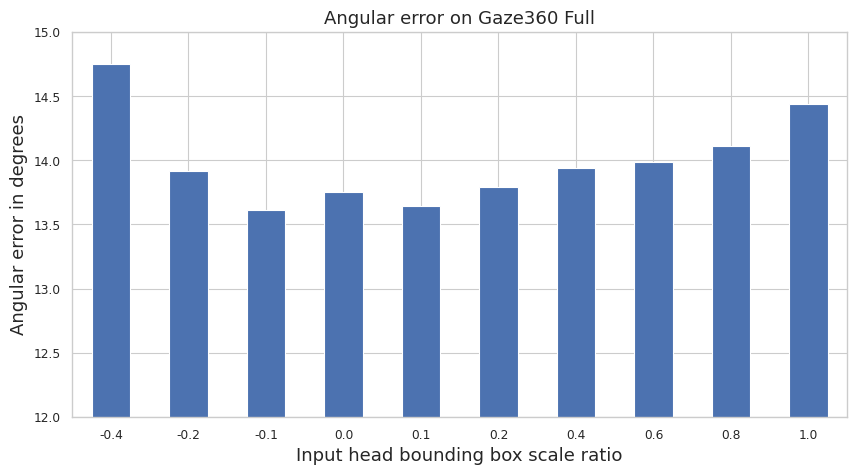

In [16]:
# make a bar plot of the rsults with the bbox scale ratio on x axis and Gaze360_full on y axis
results_table_plot = results_table.sort_values('Bbox scale ratio')
results_table_plot = results_table_plot.set_index('Bbox scale ratio')
plt.figure(figsize=(2,5))
results_table_plot['Gaze360_full'].plot(kind='bar', figsize=(10,5), title='Gaze360_full')
plt.xlabel('Input head bounding box scale ratio', fontsize=13)
plt.ylabel('Angular error in degrees', fontsize=13)
plt.title('Angular error on Gaze360 Full',fontsize=13)
# put the text for the x label horizontal
plt.xticks(rotation=0)
plt.ylim(12, 15)
plt.savefig('results/Head_crop_angular_error.png', dpi=300)

<Axes: title={'center': 'Gaze360_20'}, xlabel='Bbox scale ratio'>

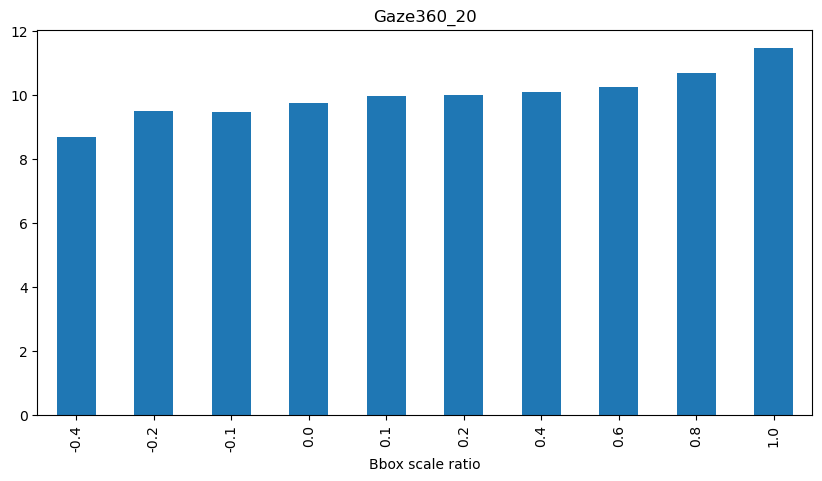

In [14]:
results_table_plot = results_table.sort_values('Bbox scale ratio')
results_table_plot = results_table_plot.set_index('Bbox scale ratio')
results_table_plot['Gaze360_20'].plot(kind='bar', figsize=(10,5), title='Gaze360_20')

<Axes: title={'center': 'Gaze360_back'}, xlabel='Bbox scale ratio'>

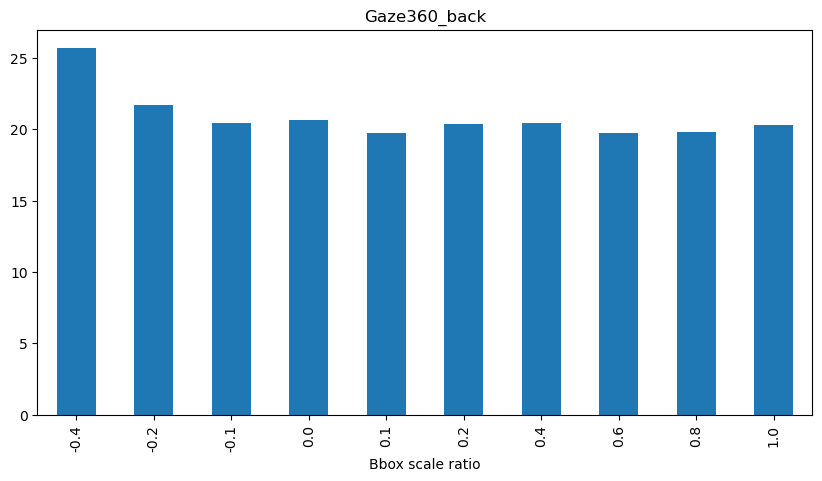

In [15]:
results_table_plot = results_table.sort_values('Bbox scale ratio')
results_table_plot = results_table_plot.set_index('Bbox scale ratio')
results_table_plot['Gaze360_back'].plot(kind='bar', figsize=(10,5), title='Gaze360_back')

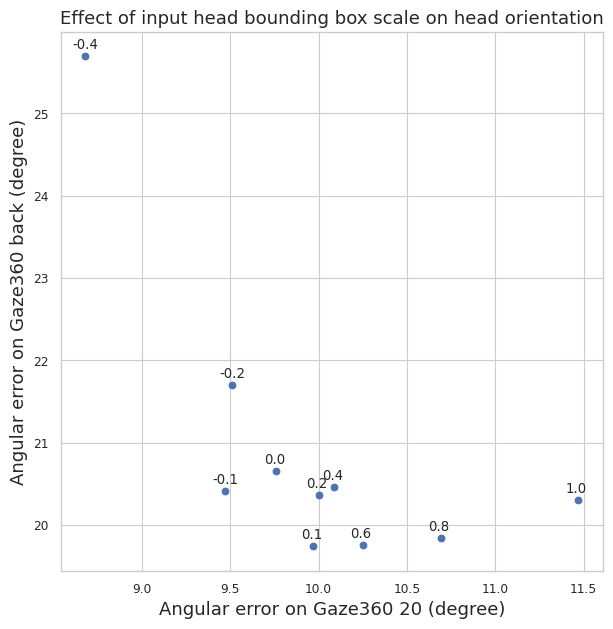

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(context ='paper',style='whitegrid')

plt.figure(figsize=(7,7))
plt.scatter(results_table['Gaze360_20'], results_table['Gaze360_back'])
for i in range(len(results_table)):
    plt.text(results_table['Gaze360_20'][i]-0.07, results_table['Gaze360_back'][i]+0.09, results_table['Bbox scale ratio'][i],) #bbox=dict(facecolor='red', alpha=0.5))
    
plt.xlabel('Angular error on Gaze360 40 (degree)',fontsize=13)
plt.ylabel('Angular error on Gaze360 back (degree)',fontsize=13)
plt.title('Effect of input head bounding box scale on head orientation',fontsize=13)
plt.savefig('results/Head_crop_effect.png', dpi=300)
plt.show()
